# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

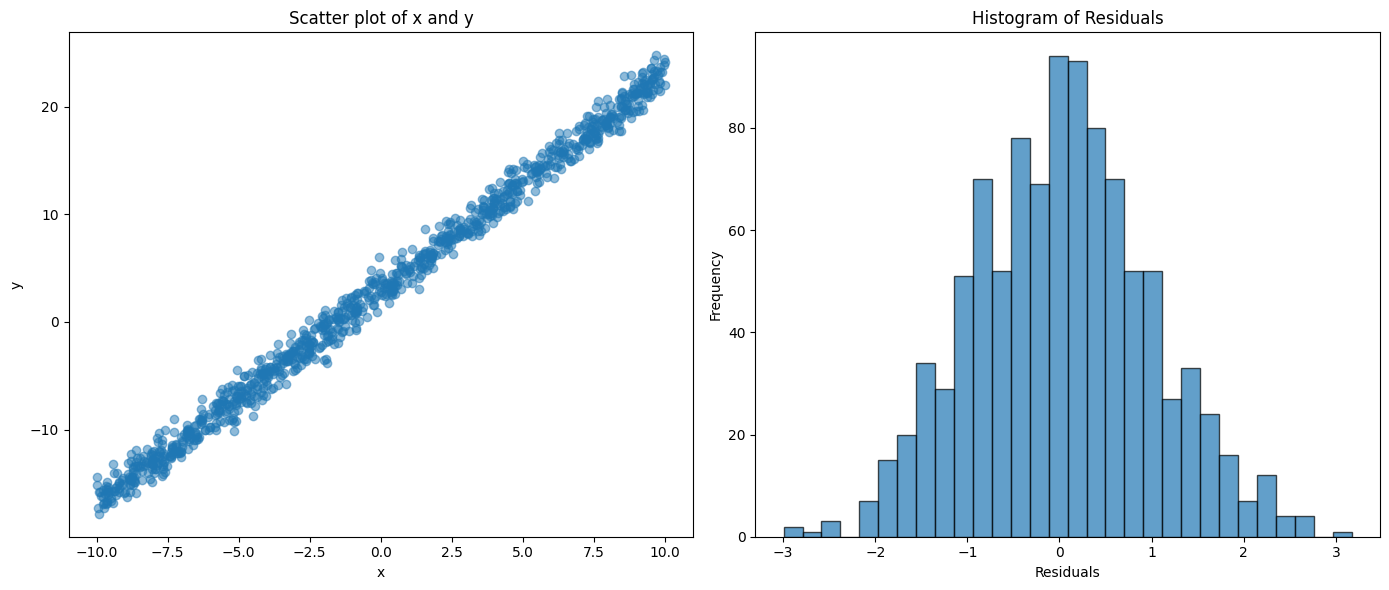

In [11]:
# Exercise 1: Generate the data once and save it for reuse
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

w = 2
b = 3
x = np.random.uniform(-10, 10, (1000, 1))  # Generating x data
y = w * x + b + np.random.randn(1000, 1)  # Generating y data with noise

# Scatter plot for x vs y
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

# Histogram of residuals (y - (wx + b))
residuals = y - (w * x + b)
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [13]:
# Exercise 2: Reuse the same x_data from Exercise 1

def model_loop(x, w, b):
    y = []
    for i in range(len(x)):
        y.append(w * x[i] + b)
    return np.array(y)

def model_np(x, w, b):
    return w * x + b

# Use the same x_data from Exercise 1
w = 2
b = 3

# Compute y using both functions
y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)

# Check if the outputs are identical
identical = np.allclose(y_loop, y_np)

# Output results
print(f"Outputs identical: {identical}")
print("First 5 values from loop-based model:", y_loop[:5])
print("First 5 values from numpy-based model:", y_np[:5])


Outputs identical: True
First 5 values from loop-based model: [[ 4.95254016]
 [11.60757465]
 [ 7.11053504]
 [ 4.79532732]
 [-0.05380803]]
First 5 values from numpy-based model: [[ 4.95254016]
 [11.60757465]
 [ 7.11053504]
 [ 4.79532732]
 [-0.05380803]]


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

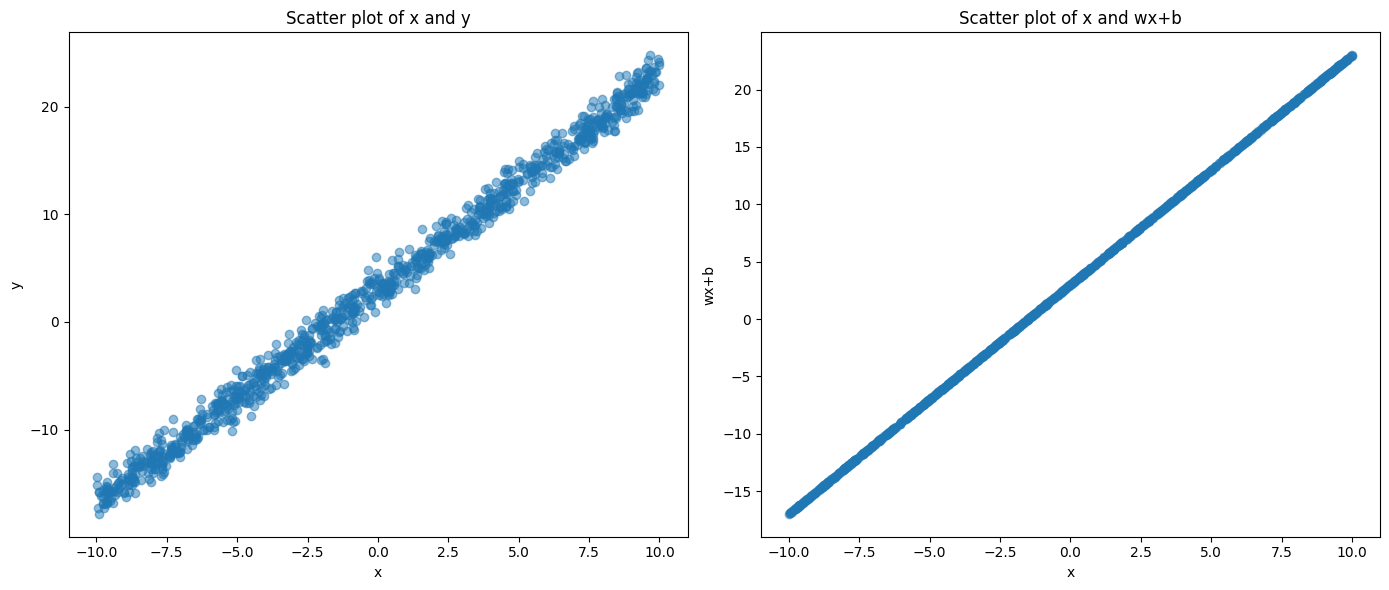

In [14]:
# Exercise 3: Reuse the same x and y data from Exercise 1
# You do not need to regenerate x and y; just use the existing variables

plt.figure(figsize=(14, 6))

# Scatter plot for x vs y (same as in Exercise 1)
plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5)  # Reusing x and y
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

# Scatter plot for x vs wx+b (model without noise)
y_np = w * x + b  # Predicted y using the original parameters without noise
plt.subplot(1, 2, 2)
plt.scatter(x, y_np, alpha=0.5)
plt.xlabel('x')
plt.ylabel('wx+b')
plt.title('Scatter plot of x and wx+b')

plt.tight_layout()
plt.show()


4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


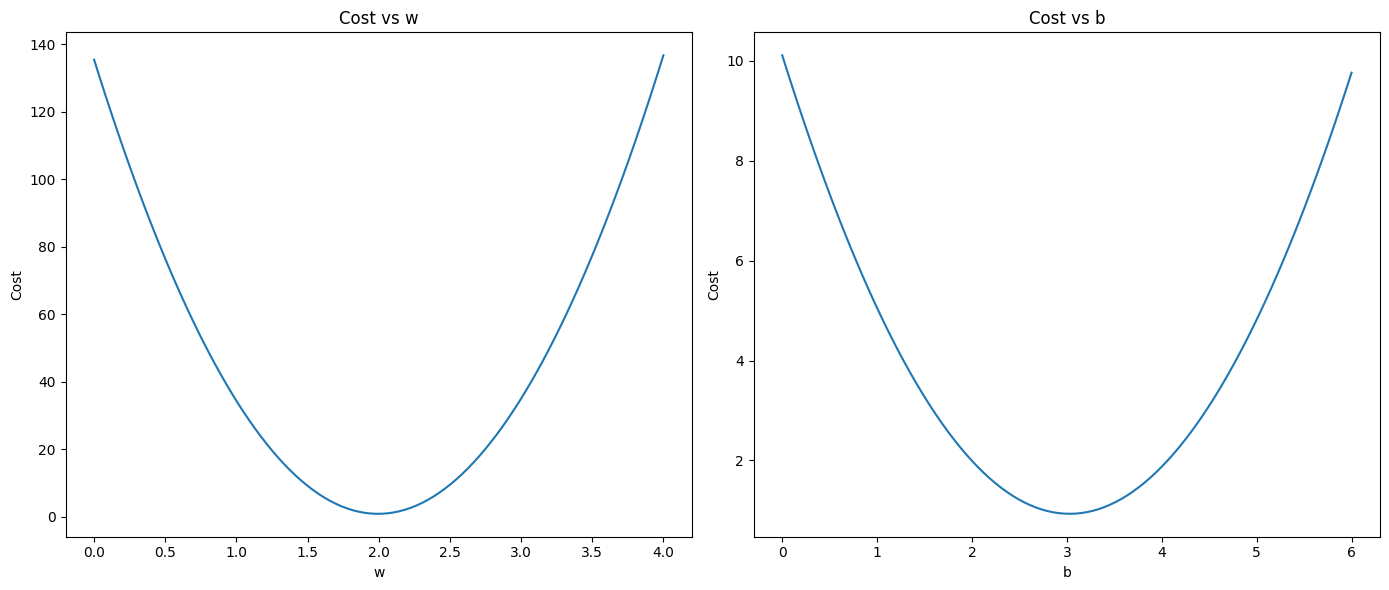

In [15]:
def cost(x, y, w, b):
    y_pred = model_np(x, w, b)
    return np.mean((y - y_pred)**2)

# Generate values for w and b
w_values = np.linspace(0, 4, 100)
b_values = np.linspace(0, 6, 100)

# Compute cost values
cost_w = [cost(x, y, w, b) for w in w_values]
cost_b = [cost(x, y, w, b) for b in b_values]

# Plot cost vs w
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(w_values, cost_w)
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost vs w')

# Plot cost vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, cost_b)
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost vs b')

plt.tight_layout()
plt.show()

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

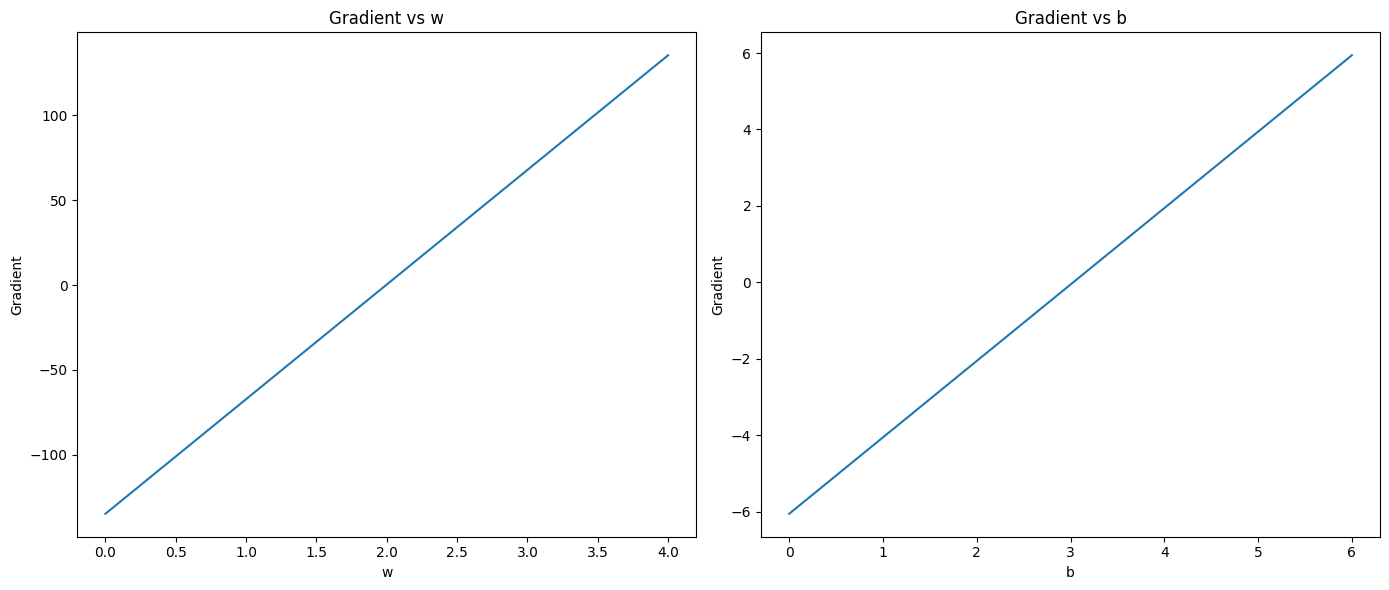

In [16]:
def gradient(x, y, w, b):
    y_pred = model_np(x, w, b)
    dJ_dw = -2 * np.mean(x * (y - y_pred))
    dJ_db = -2 * np.mean(y - y_pred)
    return dJ_dw, dJ_db

# Generate values for w and b
w_values = np.linspace(0, 4, 100)
b_values = np.linspace(0, 6, 100)

# Compute gradients
dJ_dw_values = [gradient(x, y, w, 3)[0] for w in w_values]
dJ_db_values = [gradient(x, y, 2, b)[1] for b in b_values]

# Plot gradient vs w
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

plt.plot(w_values, dJ_dw_values)
plt.xlabel('w')
plt.ylabel('Gradient')
plt.title('Gradient vs w')

# Plot gradient vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, dJ_db_values)
plt.xlabel('b')
plt.ylabel('Gradient')
plt.title('Gradient vs b')

plt.tight_layout()
plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

Iteration    0: Cost 2.38e+01  dj_dw: -1.343e+02, dj_db: -5.732e+00   w:  1.343e+00, b: 5.73181e-02
Iteration  200: Cost 9.35e-01  dj_dw: -2.657e-04, dj_db: -1.068e-01   w:  1.995e+00, b: 2.97632e+00
Iteration  400: Cost 9.33e-01  dj_dw: -4.676e-06, dj_db: -1.880e-03   w:  1.995e+00, b: 3.02773e+00
Iteration  600: Cost 9.33e-01  dj_dw: -8.231e-08, dj_db: -3.308e-05   w:  1.995e+00, b: 3.02863e+00
Iteration  800: Cost 9.33e-01  dj_dw: -1.449e-09, dj_db: -5.824e-07   w:  1.995e+00, b: 3.02865e+00
Iteration 1000: Cost 9.33e-01  dj_dw: -2.551e-11, dj_db: -1.025e-08   w:  1.995e+00, b: 3.02865e+00
Iteration 1200: Cost 9.33e-01  dj_dw: -4.408e-13, dj_db: -1.804e-10   w:  1.995e+00, b: 3.02865e+00
Iteration 1400: Cost 9.33e-01  dj_dw: -5.997e-15, dj_db: -3.176e-12   w:  1.995e+00, b: 3.02865e+00
Iteration 1600: Cost 9.33e-01  dj_dw: -6.111e-15, dj_db: -5.780e-14   w:  1.995e+00, b: 3.02865e+00
Iteration 1800: Cost 9.33e-01  dj_dw:  7.446e-15, dj_db: -2.178e-14   w:  1.995e+00, b: 3.02865e+00


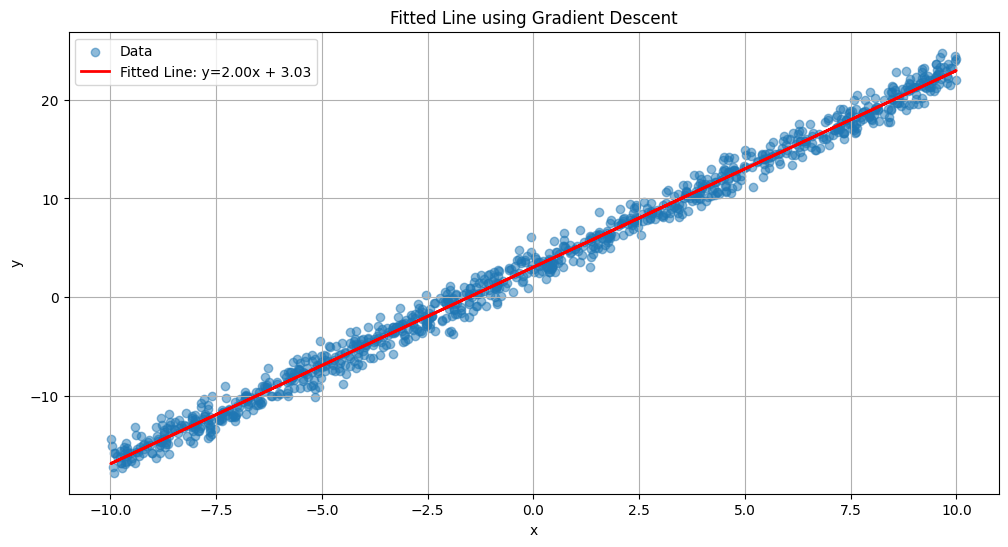

Final values: w = 1.9951, b = 3.0286


In [17]:
import copy
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

# Initial values for w and b (not the optimal values)
w_init = 0
b_init = 0
alpha = 0.01
num_iters = 2000  # Number of iterations

w_final, b_final, J_history, p_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Plot the fitted line vs the original data
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
y_pred = w_final * x + b_final
plt.plot(x, y_pred, color='red', label=f'Fitted Line: y={w_final:.2f}x + {b_final:.2f}', linewidth=2)
plt.title('Fitted Line using Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Final parameters after gradient descent
print(f"Final values: w = {w_final:.4f}, b = {b_final:.4f}")

7. Plot the cost and parameters versus iteration of gradient descent.

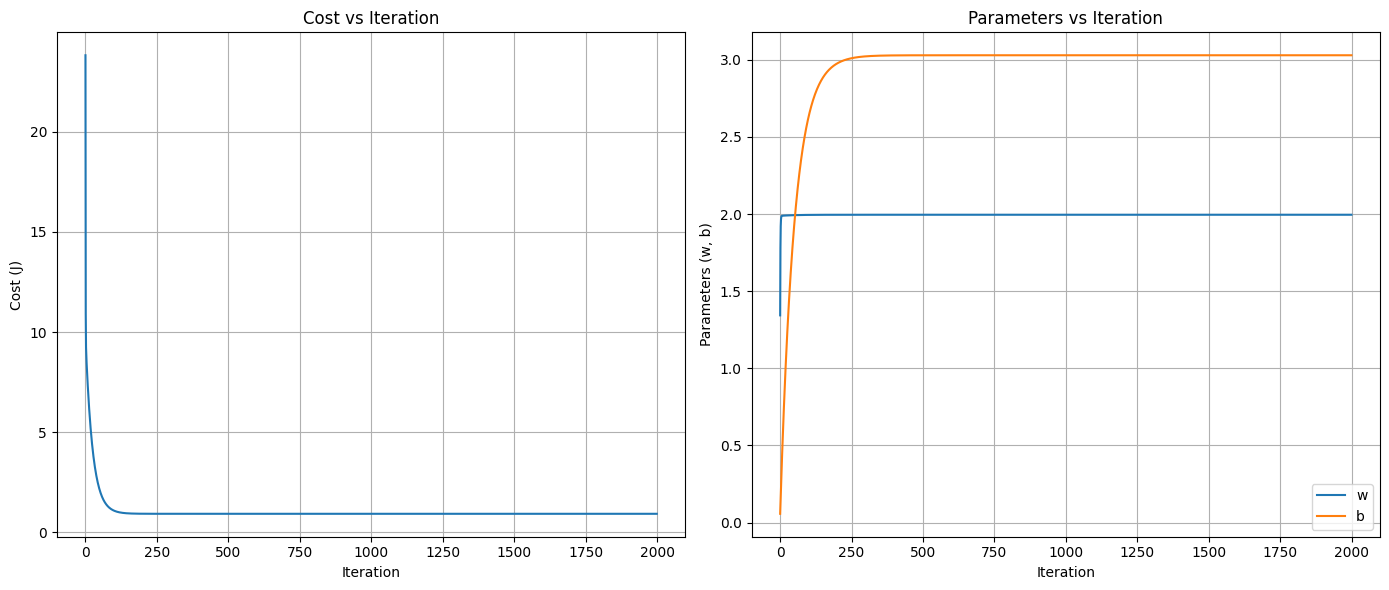

Final values: w = 1.9951, b = 3.0286


In [19]:
def plot_gradient_descent_history(J_history, p_history):

    w_history = [p[0] for p in p_history]
    b_history = [p[1] for p in p_history]
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(J_history, label='Cost (J)')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (J)')
    plt.title('Cost vs Iteration')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(w_history, label='w')
    plt.plot(b_history, label='b')
    plt.xlabel('Iteration')
    plt.ylabel('Parameters (w, b)')
    plt.title('Parameters vs Iteration')
    plt.legend()
    plt.grid(True)

    # plots
    plt.tight_layout()
    plt.show()

plot_gradient_descent_history(J_history, p_history)

# parameters
print(f"Final values: w = {w_final:.4f}, b = {b_final:.4f}")
